## Data Pre-processing

In [1]:
#importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#checking Working directory
os.getcwd()

'C:\\Users\\Dell'

In [3]:
#changing working directory
os.chdir("E:\\Data Science\\EDWISOR\\Project_1")

In [4]:
os.getcwd()

'E:\\Data Science\\EDWISOR\\Project_1'

In [5]:
#Loading data
b_rent =pd.read_csv("day.csv")

In [6]:
#setting instant as index
b_rent.set_index("instant").head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
b_rent.shape

(731, 16)

In [8]:
b_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
b_rent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
#Rename certain columns
b_rent = b_rent.rename(columns={'dteday':'date','yr':'year','mnth':'month','weathersit':'weather','hum':'humdity','cnt':'count'})

In [11]:
b_rent.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humdity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [12]:
#Data type conversions
b_rent['date']= pd.to_datetime(b_rent.date)

In [13]:
#most of the categorical data is stored as int so, convverting int as category
b_rent[['season','year','month','holiday','weekday','workingday','weather']] = b_rent[['season','year','month','holiday','weekday','workingday','weather']].astype('category')    

In [14]:
#b_rent.info()

## Exploratory data analysis

organizing, ploting, and summarizing the data 

In [15]:
b_rent['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

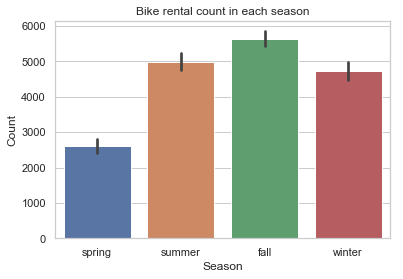

In [16]:
#plotting barplot season vs bike rental count
sns.set()
sns.set_style('whitegrid')
sns.barplot(x='season',y='count',data = b_rent)
plt.title("Bike rental count in each season")
plt.xlabel("Season")
plt.ylabel('Count')
#plt.ylim(0,500)


tick_val = [0,1,2,3]
tick_lab = ['spring','summer','fall','winter']
plt.xticks(tick_val,tick_lab)

plt.show()

In [17]:
b_rent['month'].unique()

[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

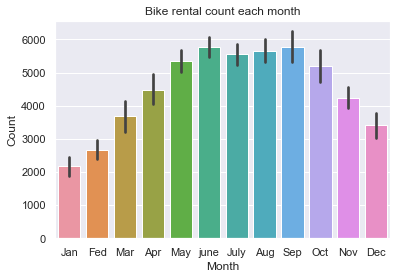

In [18]:
#plotting barplot month vs bike rental count
sns.set()
sns.barplot(x='month',y='count',data=b_rent)
plt.title("Bike rental count each month")
plt.xlabel("Month")
plt.ylabel('Count')

tick_val =[0,1,2,3,4,5,6,7,8,9,10,11]
tick_lab = ['Jan','Fed','Mar','Apr','May','june','July','Aug','Sep','Oct','Nov','Dec'] 

plt.xticks(tick_val,tick_lab)
plt.show()


In [19]:
b_rent['year'].unique()

[0, 1]
Categories (2, int64): [0, 1]

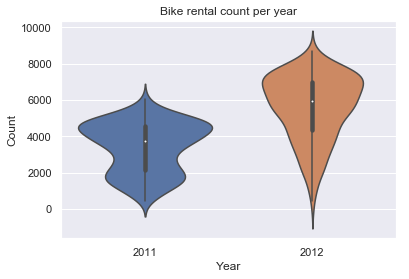

In [20]:
#plotting year vs bike rental count

sns.violinplot(data=b_rent, x='year',y='count')
plt.title("Bike rental count per year")
plt.xlabel("Year")
plt.ylabel('Count')

val = [0,1]
lab = ['2011','2012']
plt.xticks(val,lab)

plt.show()

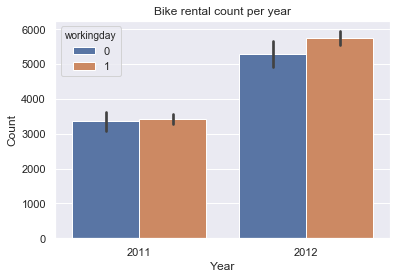

In [21]:
#year vs count with working days


sns.barplot(data=b_rent, x='year',y='count',hue='workingday')
plt.title("Bike rental count per year")
plt.xlabel("Year")
plt.ylabel('Count')

val = [0,1]
lab = ['2011','2012']
plt.xticks(val,lab)


plt.show()

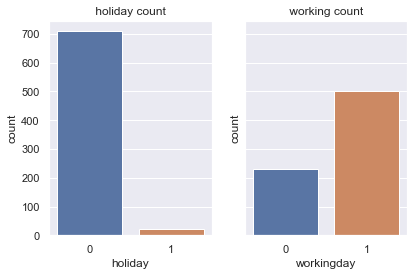

In [22]:
#plotting holidays and working days

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

sns.countplot(x='holiday',data=b_rent,ax=ax1)
ax1.set_title(" holiday count ")

sns.countplot(x='workingday',data=b_rent,ax=ax2)
ax2.set_title(" working count ")



plt.tight_layout()
plt.show()

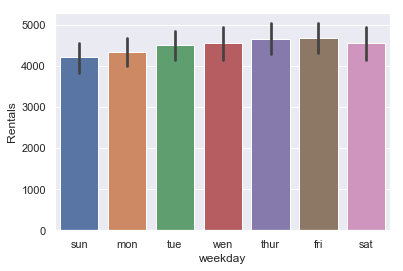

In [23]:
#plotting weekdays vs counts
sns.barplot(x='weekday', y='count' ,data=b_rent)
plt.ylabel('Rentals')
tick_val = [0,1,2,3,4,5,6]
tick_lab = ['sun','mon','tue','wen','thur','fri','sat']
plt.xticks(tick_val,tick_lab)
plt.show()

# Missing Values Analysis

In [24]:
missing_values = pd.DataFrame(b_rent.isnull().sum())
np.transpose(missing_values)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humdity,windspeed,casual,registered,count
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


So, we have to missing values to deal with

# Outlier Analysis

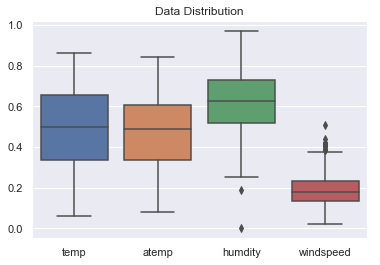

In [25]:
#Finding the outliers in the data

fig, ax = plt.subplots()

sns.boxplot(data=b_rent[['temp','atemp','humdity','windspeed']],ax=ax)
plt.title("Data Distribution")
plt.show()

here we have outliers in humdity and windspeed, but that can be ignored as it is due to adverse weather conditions which is natural

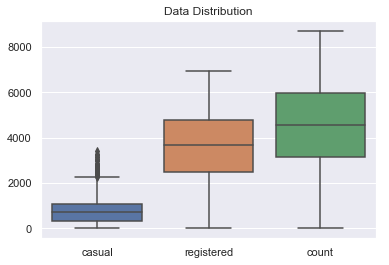

In [26]:
fig, ax = plt.subplots()

sns.boxplot(data=b_rent[['casual','registered','count']],ax=ax)
plt.title("Data Distribution")
plt.show()

In [27]:
#removing outliers

for i in b_rent[['casual']]:
    
    q75, q25 = np.percentile(b_rent.loc[:, i], [75,25])
    
    iqr= q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print('min=',min, 'max=', max)
    
    b_rent = b_rent.drop(b_rent[b_rent.loc[:,i]<min].index)
    b_rent = b_rent.drop(b_rent[b_rent.loc[:,i]>max].index)

min= -855.25 max= 2266.75


In [28]:
b_rent.shape

(687, 16)

# Feature Selection

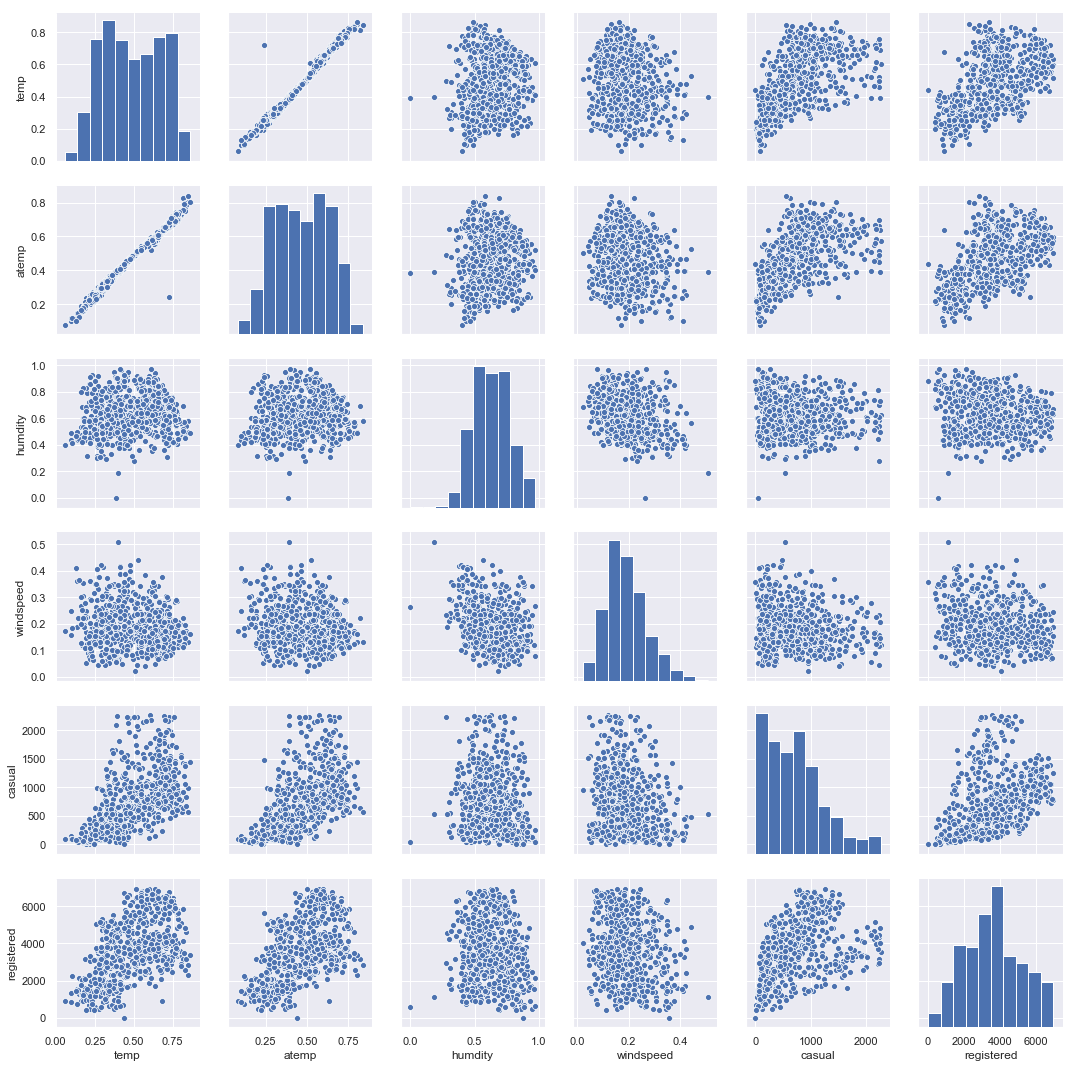

In [29]:
cols=['temp', 'atemp', 'humdity', 'windspeed','casual', 'registered']
#plotting pairs to see the correlation analysis
sns.pairplot(b_rent[cols])
plt.show()

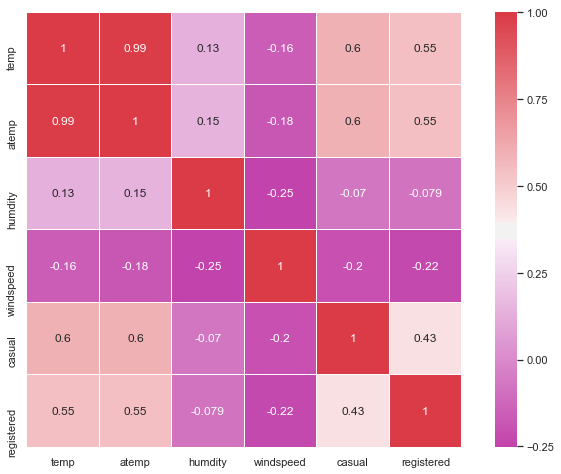

In [30]:
#correlation plot
df_corr = b_rent.loc[:,cols]

f, ax =plt.subplots(figsize=(12,8))
corr = df_corr.corr()

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(320,10,as_cmap=True),square=True, ax=ax
           ,annot =True, linewidth = 0.1)


from the correlation plot temp,atemp are almost same so, having both is meaningless.

In [31]:
#dropping atemp
b_rent =b_rent.drop(['atemp'],axis=1)

In [32]:
from scipy.stats import chi2_contingency

In [33]:
#Chi-square test for categorical variables
cat_var=['season','year','month','holiday','weekday','workingday','weather']

for i in cat_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(b_rent['count'],b_rent[i]))
    print(p)

season
0.5132912794522374
year
0.38524412679198045
month
0.4854115917709501
holiday
0.7845587226117702
weekday
0.4779487865516262
workingday
0.49471021239790564
weather
0.6747466999358342


# Feature Scaling

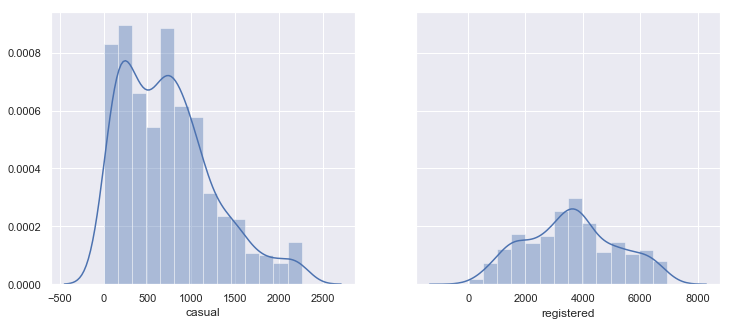

In [34]:
#plotting casual and registered data
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,5))

sns.distplot(b_rent['casual'],ax=ax1)

sns.distplot(b_rent['registered'],ax=ax2)

In [35]:
nor=['casual','registered']

In [36]:
for i in nor:
    
    b_rent[i]= (b_rent[i] - np.min(b_rent[i])) / (np.max(b_rent[i]) - np.min(b_rent[i]))

In [37]:
b_rent.shape

(687, 15)

# Model Development

In [38]:
#Dividing categorical variables and numerical variables

category_var = ['season','year','holiday','workingday','weather','month','weekday']
numerical_var = ['temp','humdity','windspeed','casual','registered']

In [39]:
#joining numerical variables

brent_model = pd.DataFrame(b_rent[numerical_var])

In [40]:
#creating dummies

for i in category_var:
    
    df= pd.get_dummies(b_rent[i],prefix= i)
    
    brent_model = brent_model.join(df)

In [41]:
brent_model.head()

,temp,humdity,windspeed,casual,registered,season_1,season_2,season_3,season_4,year_0,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344167,0.805833,0.160446,0.145833,0.091539,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.363478,0.696087,0.248539,0.057181,0.093849,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.196364,0.437273,0.248309,0.052305,0.174560,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.200000,0.590435,0.160296,0.046986,0.207046,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.226957,0.436957,0.186900,0.035461,0.216286,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Decision Tree

In [42]:
#importing sci-kit library for model selection
from sklearn.model_selection import train_test_split

#spitting data
X_train, X_test, y_train, y_test = train_test_split(brent_model, b_rent['count'],test_size = 0.3, random_state=42)

In [43]:
#importing tree
from sklearn.tree import DecisionTreeRegressor

In [50]:
#modelling
fit = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [51]:
#applying
predict_DT = fit.predict(X_test)

In [52]:
#Calculate MAPE
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual-y_pred)/y_actual))*100
    return mape

MAPE(y_test,predict_DT)

15.950052182108038

In [53]:
from sklearn.metrics import r2_score

r2_score(y_test, predict_DT)

0.8762972049208101

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
RF_reg = RandomForestClassifier(n_estimators=500)

In [71]:
RF_reg.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
RF_pred = RF_reg.predict(X_test)

In [73]:
MAPE(y_test,RF_pred)

17.78472680587086

In [74]:
r2_score(y_test,RF_pred)

0.8048979787986756

In [ ]:
#using 100 trees we get a score of 78.53%

#using 300 trees we get 83.78%

#using 500 trees we get 80.48%

# Linear Regression

In [75]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

In [76]:
reg_l = LinearRegression()
reg_l.fit(X_train, y_train)
y_pred = reg_l.predict(X_test)

In [77]:
#calculating MAPE
MAPE(y_test, y_pred)

8.183137467694459e-14

In [79]:
r2_score(y_test,y_pred)

1.0